![](https://raw.githubusercontent.com/rafneta/RNlibro/master/imagenes/banner.png)

```{contents}
:depth: 4
```

# Pandas


- [Página principal de Pandas](https://pandas.pydata.org/docs/index.html)
- [Documentación](https://pandas.pydata.org/docs/reference/index.html)

Tomamos una muestra de la guía rápida de Pandas ([10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)), junto con un par de complementos.


## Creamos objetos


In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.455321,-0.184738,0.333850,0.961449
2013-01-02,-0.858395,0.079732,-0.320788,1.997926
2013-01-03,1.087276,-1.169850,-2.068521,0.462950
2013-01-04,0.498995,-2.838760,-1.003164,-0.045184
2013-01-05,1.997344,-1.932098,-1.890690,0.957816
2013-01-06,-1.551034,0.218142,-0.334992,0.423653


In [5]:
df2 = pd.DataFrame(

    {

        "A": 1.0,

        "B": pd.Timestamp("20130102"),

        "C": pd.Series(1, index=list(range(4)), dtype="float32"),

        "D": np.array([3] * 4, dtype="int32"),

        "E": pd.Categorical(["test", "train", "test", "train"]),

        "F": "foo",

    }

)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Dependiendo del editor de texto, se puede utilizar `<TAB>` para tener un despliegue de métodos.
   
Normalmente tenemos un archivo (local o remoto), con los datos. Tomaremos un ejemplo del repositorio de datos de [UCI, Machine Learning Repository](https://archive-beta.ics.uci.edu/)


Se tomará el siguiente conjunto de datos [Adult](https://archive-beta.ics.uci.edu/ml/datasets/adult) (1996). UCI Machine Learning Repository.

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt: continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [7]:
datos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
datos

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
datos = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    header = None)
datos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
columnas = ["age", "workclass", "fnlwgt", "education", "education_num",
            "marital_status", "occupation","relationship", "race", "sex",
            "capital_gain","capital_loss","hours-per-week", "native-country", "class"]

datos = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    header = None,
    names = columnas
    )
datos

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Desplegar los datos



In [10]:
df.head()

,A,B,C,D
2013-01-01,1.455321,-0.184738,0.333850,0.961449
2013-01-02,-0.858395,0.079732,-0.320788,1.997926
2013-01-03,1.087276,-1.169850,-2.068521,0.462950
2013-01-04,0.498995,-2.838760,-1.003164,-0.045184
2013-01-05,1.997344,-1.932098,-1.890690,0.957816


In [11]:
df.tail()

,A,B,C,D
2013-01-02,-0.858395,0.079732,-0.320788,1.997926
2013-01-03,1.087276,-1.169850,-2.068521,0.462950
2013-01-04,0.498995,-2.838760,-1.003164,-0.045184
2013-01-05,1.997344,-1.932098,-1.890690,0.957816
2013-01-06,-1.551034,0.218142,-0.334992,0.423653


In [12]:
df.to_numpy()

array([[ 1.45532142, -0.18473784,  0.33384961,  0.9614487 ],
       [-0.85839453,  0.07973233, -0.32078786,  1.99792558],
       [ 1.08727617, -1.16984994, -2.06852122,  0.46294984],
       [ 0.4989945 , -2.8387598 , -1.0031641 , -0.0451839 ],
       [ 1.99734439, -1.93209754, -1.89069024,  0.95781627],
       [-1.55103445,  0.21814194, -0.3349922 ,  0.42365334]])

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.438251,-0.971262,-0.880718,0.793102
std,1.380484,1.231916,0.952095,0.700755
min,-1.551034,-2.838760,-2.068521,-0.045184
25%,-0.519047,-1.741536,-1.668809,0.433477
50%,0.793135,-0.677294,-0.669078,0.710383
75%,1.363310,0.013615,-0.324339,0.960541
max,1.997344,0.218142,0.333850,1.997926


In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.455321,-0.858395,1.087276,0.498995,1.997344,-1.551034
B,-0.184738,0.079732,-1.169850,-2.838760,-1.932098,0.218142
C,0.333850,-0.320788,-2.068521,-1.003164,-1.890690,-0.334992
D,0.961449,1.997926,0.462950,-0.045184,0.957816,0.423653


In [16]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,0.961449,0.333850,-0.184738,1.455321
2013-01-02,1.997926,-0.320788,0.079732,-0.858395
2013-01-03,0.462950,-2.068521,-1.169850,1.087276
2013-01-04,-0.045184,-1.003164,-2.838760,0.498995
2013-01-05,0.957816,-1.890690,-1.932098,1.997344
2013-01-06,0.423653,-0.334992,0.218142,-1.551034


In [17]:
df.sort_values(by="B")

,A,B,C,D
2013-01-04,0.498995,-2.838760,-1.003164,-0.045184
2013-01-05,1.997344,-1.932098,-1.890690,0.957816
2013-01-03,1.087276,-1.169850,-2.068521,0.462950
2013-01-01,1.455321,-0.184738,0.333850,0.961449
2013-01-02,-0.858395,0.079732,-0.320788,1.997926
2013-01-06,-1.551034,0.218142,-0.334992,0.423653


## Selección

In [18]:
df["A"]

2013-01-01    1.455321
2013-01-02   -0.858395
2013-01-03    1.087276
2013-01-04    0.498995
2013-01-05    1.997344
2013-01-06   -1.551034
Freq: D, Name: A, dtype: float64

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,1.455321,-0.184738,0.333850,0.961449
2013-01-02,-0.858395,0.079732,-0.320788,1.997926
2013-01-03,1.087276,-1.169850,-2.068521,0.462950


In [20]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.858395,0.079732,-0.320788,1.997926
2013-01-03,1.087276,-1.169850,-2.068521,0.462950
2013-01-04,0.498995,-2.838760,-1.003164,-0.045184


### Selección con etiqueta

In [21]:
df.loc[dates[0]]

A    1.455321
B   -0.184738
C    0.333850
D    0.961449
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.455321,-0.184738
2013-01-02,-0.858395,0.079732
2013-01-03,1.087276,-1.169850
2013-01-04,0.498995,-2.838760
2013-01-05,1.997344,-1.932098
2013-01-06,-1.551034,0.218142


In [23]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.858395,0.079732
2013-01-03,1.087276,-1.169850
2013-01-04,0.498995,-2.838760


In [24]:
df.loc["20130102", ["A", "B"]]

A   -0.858395
B    0.079732
Name: 2013-01-02 00:00:00, dtype: float64

In [25]:
df.loc[dates[0], "A"]

1.4553214189718777

### Selección por posición 

In [26]:
df.iloc[3]

A    0.498995
B   -2.838760
C   -1.003164
D   -0.045184
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.498995,-2.838760
2013-01-05,1.997344,-1.932098


In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.858395,-0.320788
2013-01-03,1.087276,-2.068521
2013-01-05,1.997344,-1.890690


In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.858395,0.079732,-0.320788,1.997926
2013-01-03,1.087276,-1.169850,-2.068521,0.462950


### Indexado lógico

In [30]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.455321,-0.184738,0.333850,0.961449
2013-01-03,1.087276,-1.169850,-2.068521,0.462950
2013-01-04,0.498995,-2.838760,-1.003164,-0.045184
2013-01-05,1.997344,-1.932098,-1.890690,0.957816


In [31]:
df[df > 0]

,A,B,C,D
2013-01-01,1.455321,NaN,0.33385,0.961449
2013-01-02,NaN,0.079732,NaN,1.997926
2013-01-03,1.087276,NaN,NaN,0.462950
2013-01-04,0.498995,NaN,NaN,NaN
2013-01-05,1.997344,NaN,NaN,0.957816
2013-01-06,NaN,0.218142,NaN,0.423653


### Asignación

In [32]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [33]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,1.455321,-0.184738,0.333850,5
2013-01-02,-0.858395,0.079732,-0.320788,5
2013-01-03,1.087276,-1.169850,-2.068521,5
2013-01-04,0.498995,-2.838760,-1.003164,5
2013-01-05,1.997344,-1.932098,-1.890690,5
2013-01-06,-1.551034,0.218142,-0.334992,5


## Datos Faltantes

In [34]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,1.455321,-0.184738,0.333850,5,1.0
2013-01-02,-0.858395,0.079732,-0.320788,5,1.0
2013-01-03,1.087276,-1.169850,-2.068521,5,NaN
2013-01-04,0.498995,-2.838760,-1.003164,5,NaN


In [35]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,1.455321,-0.184738,0.333850,5,1.0
2013-01-02,-0.858395,0.079732,-0.320788,5,1.0


In [36]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.455321,-0.184738,0.333850,5,1.0
2013-01-02,-0.858395,0.079732,-0.320788,5,1.0
2013-01-03,1.087276,-1.169850,-2.068521,5,5.0
2013-01-04,0.498995,-2.838760,-1.003164,5,5.0


In [37]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operaciones

In [38]:
df.mean()

A    0.438251
B   -0.971262
C   -0.880718
D    5.000000
dtype: float64

In [39]:
df.mean(1)

2013-01-01    1.651108
2013-01-02    0.975137
2013-01-03    0.712226
2013-01-04    0.414268
2013-01-05    0.793639
2013-01-06    0.833029
Freq: D, dtype: float64

In [40]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.455321,-0.184738,0.333850,5
2013-01-02,0.596927,-0.105006,0.013062,10
2013-01-03,1.684203,-1.274855,-2.055459,15
2013-01-04,2.183198,-4.113615,-3.058624,20
2013-01-05,4.180542,-6.045713,-4.949314,25
2013-01-06,2.629507,-5.827571,-5.284306,30


## Gráficas

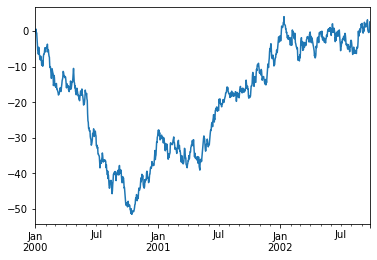

In [41]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot(); # Investigar tarea moral

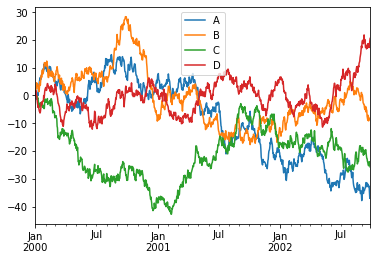

In [42]:
df = pd.DataFrame(

    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]

)

df = df.cumsum()
df.plot();


## Guardar

In [43]:
df.to_csv("foo.csv")

In [44]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")